In [3]:
import os
import h5py

def scan_and_count_targets(folder_path, target_keys=("reconstruction_rss", "reconstruction_esc")):
    """
    Scans all .h5 files in a folder and reports which ones contain target images.

    Args:
        folder_path (str or Path): Path to the folder containing .h5 files.
        target_keys (tuple): Possible keys indicating target images.

    Returns:
        dict: filename -> True/False depending on whether a target is found.
    """
    results = {}
    count_with_target = 0
    count_without_target = 0

    for fname in os.listdir(folder_path):
        if fname.endswith(".h5"):
            full_path = os.path.join(folder_path, fname)
            try:
                with h5py.File(full_path, 'r') as f:
                    has_target = any(key in f for key in target_keys)
                    results[fname] = has_target
                    if has_target:
                        count_with_target += 1
                    else:
                        count_without_target += 1
            except Exception as e:
                results[fname] = f"Error: {e}"

    return results, count_with_target, count_without_target

folder = r"C:\Users\kostanjsek\Documents\knee_mri\knee_singlecoil_train\singlecoil_train"
results, has_target, no_target = scan_and_count_targets(folder)

print(f"📂 Total .h5 files: {len(results)}")
print(f"✅ Files with targets: {has_target}")
print(f"❌ Files without targets: {no_target}")

#for fname, has_target in results.items():
#    print(f"{fname}: {'✅ target present' if has_target is True else '❌ target missing' if has_target is False else has_target}")

#print(results)

📂 Total .h5 files: 973
✅ Files with targets: 973
❌ Files without targets: 0


In [4]:
folder = r"C:\Users\kostanjsek\Documents\knee_mri\knee_singlecoil_val\singlecoil_val"  # or whichever folder you're testing
print("Folder exists:", os.path.exists(folder))
print("Files in folder:")
print(os.listdir(folder))

h5_files = [f for f in os.listdir(folder) if f.endswith(".h5")]
print(f"Found {len(h5_files)} .h5 files:")


test_file = os.path.join(folder, h5_files[0])  # first file
with h5py.File(test_file, 'r') as f:
    print("Keys inside file:")
    print(list(f.keys()))
    print(len(f.keys()))


Folder exists: True
Files in folder:
['file1000000.h5', 'file1000007.h5', 'file1000017.h5', 'file1000026.h5', 'file1000031.h5', 'file1000033.h5', 'file1000041.h5', 'file1000052.h5', 'file1000071.h5', 'file1000073.h5', 'file1000107.h5', 'file1000108.h5', 'file1000114.h5', 'file1000126.h5', 'file1000153.h5', 'file1000178.h5', 'file1000182.h5', 'file1000190.h5', 'file1000196.h5', 'file1000201.h5', 'file1000206.h5', 'file1000229.h5', 'file1000243.h5', 'file1000247.h5', 'file1000254.h5', 'file1000263.h5', 'file1000264.h5', 'file1000267.h5', 'file1000273.h5', 'file1000277.h5', 'file1000280.h5', 'file1000283.h5', 'file1000291.h5', 'file1000292.h5', 'file1000308.h5', 'file1000314.h5', 'file1000323.h5', 'file1000325.h5', 'file1000328.h5', 'file1000344.h5', 'file1000350.h5', 'file1000356.h5', 'file1000389.h5', 'file1000432.h5', 'file1000464.h5', 'file1000476.h5', 'file1000477.h5', 'file1000480.h5', 'file1000496.h5', 'file1000528.h5', 'file1000537.h5', 'file1000538.h5', 'file1000552.h5', 'file100

In [5]:
def count_slices_per_file(folder_path):
    slice_counts = {}
    for fname in os.listdir(folder_path):
        if fname.endswith(".h5"):
            path = os.path.join(folder_path, fname)
            with h5py.File(path, 'r') as f:
                num_slices = f['kspace'].shape[0]
                slice_counts[fname] = num_slices
    return slice_counts

# Example usage:
folder = r"C:\Users\kostanjsek\Documents\knee_mri\knee_singlecoil_val\singlecoil_val"
counts = count_slices_per_file(folder)
print(f"Total slices: {sum(counts.values())}")
print("Top 5 files by slice count:")
for k in sorted(counts, key=counts.get, reverse=True)[:5]:
    print(f"{k}: {counts[k]} slices")


def count_slices_single_file(folder_path):
    # Get a sorted list of .h5 files
    h5_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".h5")])
    if not h5_files:
        print("No .h5 files found in folder.")
        return

    single_file = h5_files[198]
    single_file_path = os.path.join(folder_path, single_file)

    with h5py.File(single_file_path, 'r') as f:
        num_slices = f['kspace'].shape[0]
        print(f"File: {single_file}")
        print(f"Number of slices: {num_slices}")    

count_slices_single_file(folder)

Total slices: 7135
Top 5 files by slice count:
file1002351.h5: 46 slices
file1002451.h5: 46 slices
file1001763.h5: 45 slices
file1001938.h5: 45 slices
file1000277.h5: 42 slices
File: file1002570.h5
Number of slices: 33


Keys: ['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']
Attrs: {'acquisition': 'CORPDFS_FBK', 'max': np.float64(0.0001537275713242826), 'norm': np.float64(0.04750838076305816), 'patient_id': 'd7f12ba7cfb097ea9d97c2896be202db152288abcb76335dd4ec82b02fd759d8'}
complex64
(32, 640, 372)


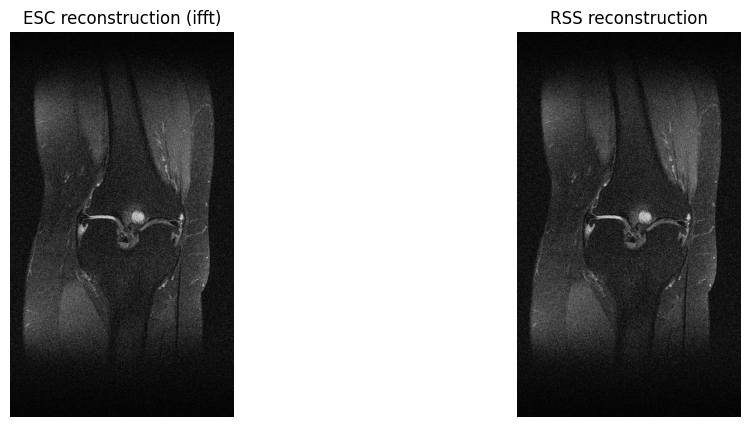

In [8]:
import fastmri
from matplotlib import pyplot as plt
import numpy as np
import torch

file_path = r"C:\Users\kostanjsek\Documents\knee_mri\knee_singlecoil_val\singlecoil_val\file1000178.h5"

#with h5py.File(file_path, 'r') as f:
#    print(f"Keys in {file_path}: {list(f.keys())}")

hf = h5py.File(file_path)
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

volume_kspace = hf['kspace'][()]
print(volume_kspace.dtype)
print(volume_kspace.shape) # (number of slices, height, width)

slice_kspace = volume_kspace[20] # Choosing the 20-th slice of this volume

# ---- Convert to torch tensor with explicit real/imag dimension ----
# shape becomes (H, W, 2)
slice_kspace_torch = torch.view_as_real(torch.tensor(slice_kspace))

# --- ESC reconstruction (inverse FFT) ---
esc_recon = fastmri.ifft2c(slice_kspace_torch)   # shape (H, W, 2)
esc_recon_abs = fastmri.complex_abs(esc_recon)   # magnitude

# --- RSS reconstruction (adds coil dimension if needed) ---
rss_recon = fastmri.rss(esc_recon_abs[None], dim=0)

# --- Visualization ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(esc_recon_abs.numpy(), cmap='gray')
plt.title("ESC reconstruction (ifft)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rss_recon.numpy(), cmap='gray')
plt.title("RSS reconstruction")
plt.axis("off")

plt.show()


In [32]:
from fastmri.data import SliceDataset
help(SliceDataset)

Help on class SliceDataset in module fastmri.data.mri_data:

class SliceDataset(torch.utils.data.dataset.Dataset)
 |  SliceDataset(
 |      root: Union[str, pathlib._local.Path, os.PathLike],
 |      challenge: str,
 |      transform: Optional[Callable] = None,
 |      use_dataset_cache: bool = False,
 |      sample_rate: Optional[float] = None,
 |      volume_sample_rate: Optional[float] = None,
 |      dataset_cache_file: Union[str, pathlib._local.Path, os.PathLike] = 'dataset_cache.pkl',
 |      num_cols: Optional[Tuple[int]] = None,
 |      raw_sample_filter: Optional[Callable] = None
 |  )
 |
 |  A PyTorch Dataset that provides access to MR image slices.
 |
 |  Method resolution order:
 |      SliceDataset
 |      torch.utils.data.dataset.Dataset
 |      typing.Generic
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __getitem__(self, i: int)
 |
 |  __init__(
 |      self,
 |      root: Union[str, pathlib._local.Path, os.PathLike],
 |      challenge: str,
 |      transf